In [252]:
import numpy as np
import pandas as pd
from sklearn import datasets #open source data analysis library, and the gold standard for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from PIL import Image # Python Imaging Library

## Reading the new csv file with part of the day included

In [281]:
df = pd.read_csv('../04-Explanatory-Analysis/data/bikes_part_of_the_day.csv',parse_dates=['datetime'])


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         17379 non-null  datetime64[ns]
 1   season           17379 non-null  int64         
 2   holiday          17379 non-null  int64         
 3   workingday       17379 non-null  int64         
 4   weather          17379 non-null  int64         
 5   temp             17379 non-null  float64       
 6   atemp            17379 non-null  float64       
 7   humidity         17379 non-null  int64         
 8   windspeed        17379 non-null  float64       
 9   casual           10886 non-null  float64       
 10  registered       10886 non-null  float64       
 11  count            17379 non-null  int64         
 12  day              17379 non-null  int64         
 13  hour             17379 non-null  int64         
 14  month            17379 non-null  int64

In [283]:
df['date']=df['datetime'].dt.date

## Creating a filter for the only one year (2011), to try with both dataframes.

In [286]:
mask_temp = (df['datetime'] >= "2011-01-01 00:00:00") & (df['datetime'] <= "2011-12-31 23:00:00")

In [287]:
mask_temp

0         True
1         True
2         True
3         True
4         True
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: datetime, Length: 17379, dtype: bool

In [288]:
yeareleven=df[mask_temp]

In [289]:
yeareleven

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,part_of_the_day,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,1,0,1,late_night,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,1,late_night,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,1,2,1,late_night,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,1,3,1,late_night,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,1,4,1,late_night,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,2011-12-31 19:00:00,1,0,0,1,17.22,21.210,54,15.0013,NaN,NaN,131,31,19,12,afternoon,2011-12-31
8641,2011-12-31 20:00:00,1,0,0,1,17.22,21.210,54,15.0013,NaN,NaN,105,31,20,12,afternoon,2011-12-31
8642,2011-12-31 21:00:00,1,0,0,1,16.40,20.455,58,12.9980,NaN,NaN,91,31,21,12,afternoon,2011-12-31
8643,2011-12-31 22:00:00,1,0,0,1,15.58,19.695,62,8.9981,NaN,NaN,76,31,22,12,night,2011-12-31


In [290]:
data_season=df[df['season']==2]

## setting a model and checking which variables give more accuracy to the rsquare

In [331]:
model_total = sm.ols(formula='count ~ temp + atemp+ workingday+holiday +month+ season+part_of_the_day +weather', 
                    
                     data=df).fit()

In [329]:
model_total

In [332]:
model_total.rsquared_adj

0.5062733197905527

## before this analysis, expectaction was that temp was highly correlated, or holiday/working day with the count, but the variable that has a bigger impact is  'part_of_the_day', finding this variable then more interesting to explore:

## Grouping the counts by season and part of the day

In [300]:
df_small=df.groupby(['season','date','part_of_the_day'])[['count']].sum()


In [301]:
df_small

count
season date       part_of_the_day       
1      2011-01-01 afternoon          612
                  late_night         105
                  morning            201
                  night               67
       2011-01-02 afternoon          485
...                                  ...
4      2012-12-19 night              217
       2012-12-20 afternoon         2512
                  late_night         253
                  morning           1872
                  night              173

[2913 rows x 1 columns]

In [302]:
df_small_plot=df_small.groupby(['season','part_of_the_day']).mean()

In [303]:
df_small_plot.reset_index(inplace=True)

In [304]:
df_small_plot

,season,part_of_the_day,count
0,1,afternoon,1462.607735
1,1,late_night,119.402235
2,1,morning,850.172222
3,1,night,109.444444
4,2,afternoon,2948.293478
5,2,late_night,233.489130
6,2,morning,1507.989130
7,2,night,243.364130
8,3,afternoon,3298.845745
9,3,late_night,299.042781


In [305]:
df.groupby(['part_of_the_day'])['count'].mean()

part_of_the_day
afternoon     293.502668
late_night     32.805839
morning       235.311025
night         111.326923
Name: count, dtype: float64

## graphics show the mean of the counts per year and per part of the day, also separated by season

### Since the variable to focus on would be depending on the part of the day, analyse/discussion in presentation would focus on the possibilites of AB Testing for pricing depending on the time of the day when bikes will be rented. 

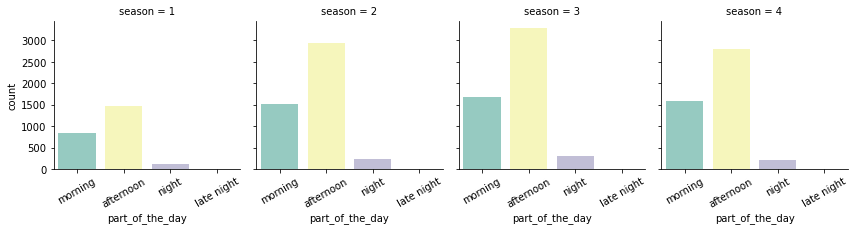

In [306]:
g=sns.FacetGrid(df_small_plot,col='season')



g.map(sns.barplot,'part_of_the_day','count',
      palette='Set3',
      order=['morning','afternoon','night','late night'])
g.set_xticklabels(rotation=30);
            

## further plottings for more information/input on the influence from 'part_of_the_day' on the number of counts

<AxesSubplot:>

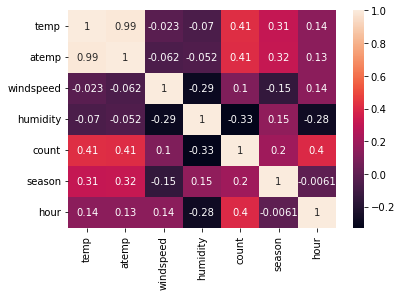

In [307]:
sns.heatmap(df_temp.corr(),annot=True)

<AxesSubplot:xlabel='part_of_the_day', ylabel='count'>

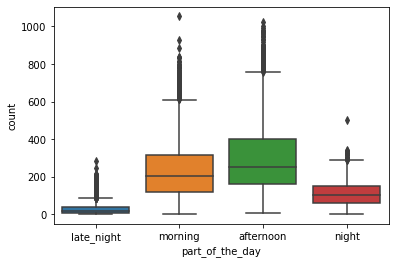

In [308]:
sns.boxplot(data=df, x='part_of_the_day', y='count')


In [113]:
import scipy.stats as sps

In [309]:
late_night = df[df['part_of_the_day'] == 'late_night']
morning = df[df['part_of_the_day'] == 'morning']
afternoon = df[df['part_of_the_day'] == 'afternoon']

night = df[df['part_of_the_day'] == 'night']

In [310]:
sps.ttest_ind(afternoon['count'], morning['count'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=17.818991746731868, pvalue=5.770860364105422e-70)

In [311]:
sps.ttest_ind(night['count'], morning['count'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=-42.243373649037146, pvalue=0.0)

In [312]:
model_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     531.8
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:57:10   Log-Likelihood:                -27690.
No. Observations:                4409   AIC:                         5.540e+04
Df Residuals:                    4399   BIC:                         5.546e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        36.7951      2.624     14.020      0.000      31.650      41.940
part_of_the_day[T.evening]      145.4162     10.449     13.917      0.000     124.932     165.901
part_of_the_day[T.late_night]  -266.1657      6.093    -43.685      0.000    -278.111    -254.221
part_of_the_day[T.morning]      -74.0547      5.760    -12.857      0.000     -85.347     -62.763
part_of_the_day[T.night]       -107.8862      6.121    -17.624      0.000    -119.887     -95.885
temp                              0.8459      2.377      0.356      0.722      -3.814       5.506
atemp                             7.0209      2.197      3.196      0.001       2.714      11.327
workingday                      -18.8824      4.346     -4.345      0.000     -27.402     -10.363
holiday                         -46.2160     13.798     -3.349      0.001     -73.267     -19.165
season                           73.5902      5.249     14.020      0.000      63.300      83.881
weather                         -42.4545      3.046    -13.939      0.000     -48.425     -36.483
==============================================================================
Omnibus:                      752.346   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1477.447
Skew:                           1.037   Prob(JB):                         0.00
Kurtosis:                       4.935   Cond. No.                     8.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

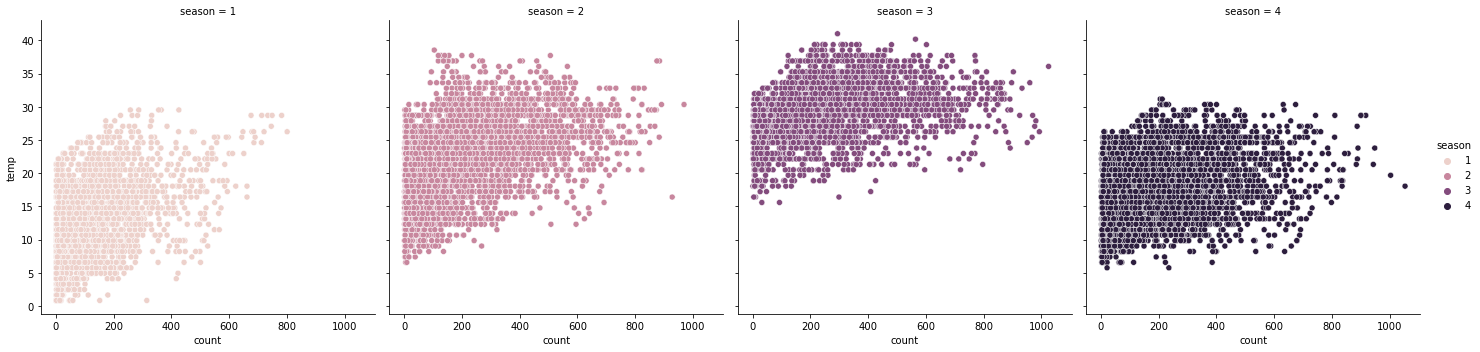

In [118]:
#sns.lmplot(data=temp, x='count', y='temp', ci=None);

#plt.scatter(data =temp,x ='count', y='temp')

#plt.figure(figsize=(20000, 20000));


sns.relplot(x='count',y='temp',
            kind='scatter',
            hue='season',
            col='season',
            data=df);

